# **Hand Written Digit Prediction - Classification Analysis**

**The digits dataset consists of 8x8 pixel images of digits. The images attribute ofthe dataset stores 8x8 arrays of gryscale values for each image.We will use these arrays to visualize these first 4 images. The target attribute of the dataset stores the digiteach image represents.**

## **Objective**

`**The objective is to develop a machine learning model to accurately classify handwritten digits based on 8x8 pixel grayscale images from the digits dataset.**

## **Data Source**

**The dataset used for this project is the "digits" dataset from scikit-learn's built-in datasets. It contains images of handwritten digits, where each image is an 8x8 pixel matrix, and the target variable represents the actual digit value (0-9).**

## **Import Library**

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

## **Import Data**

In [3]:
#Load the digits dtaset
digits=load_digits()

## **Describe Data**

In [4]:
# Get information about the dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

## **Data Visualization**

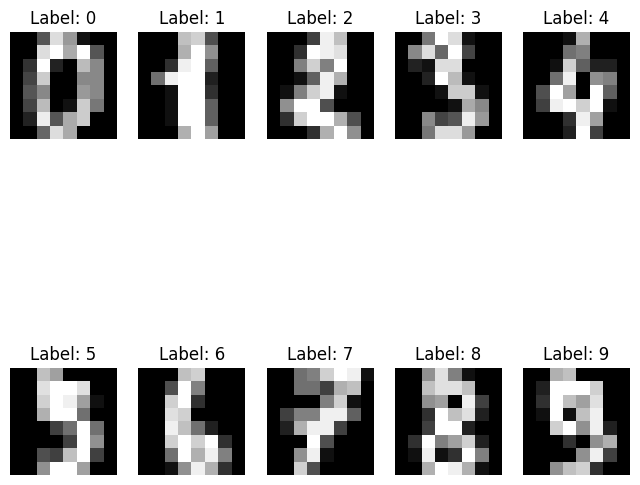

In [5]:
#Visualize a few sample images from the dataset
plt.figure(figsize=(8,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(digits.images[i], cmap='gray')
  plt.title(f"Label: {digits.target[i]}")
  plt.axis('off')
plt.show()

## **Data Preprocessing**

In [6]:
# Flatten the 8x8 images into a 1D array for feature variables
X = digits.data

# Normalize feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the target variable (y)
y = digits.target

## **Train Test Split**

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [10]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

## **Model Evaluation**

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9722222222222222
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

   

## **Prediction**

In [13]:
from PIL import Image

# Load the image and convert it to grayscale
image = Image.open('R.png').convert('L')

# Resize the image to 8x8 pixels (the same size as the dataset images)
image = image.resize((8, 8))

# Convert the image to a numpy array
new_image = np.array(image)

# Flatten the 8x8 image into a 1D array for prediction
new_image_flattened = new_image.flatten().reshape(1, -1)

# Scale the feature variables using the previously defined scaler
new_image_scaled = scaler.transform(new_image_flattened)

# Make a prediction using the model
predicted_digit = model.predict(new_image_scaled)

print("Predicted Digit:", predicted_digit[0])

Predicted Digit: 4
